# Non-linearity param

Ocean Science Figs: 7, B10

LJK

Date created: 07/02/24

Last edited: 09/19/24

In [1]:
import csv,json
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../RCLVatlas/')
sys.path.append('../RCLVatlas/RCLVatlas/')
from mainfunctions_for_RCLV_atlas import *
from config import *

In [2]:
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [3]:
eddy_dir = project_output_dir + 'SLA_eddies/'
anti_filename = 'anticyc_eddy_data_minage31_minsize12_tolno3_20000101_to_20191231_8day_subset_v3.csv'
cyc_filename = 'cyc_eddy_data_minage31_minsize12_tolno3_20000101_to_20191231_8day_subset_v3.csv'

anti_df = pd.read_csv(eddy_dir + anti_filename)
cyc_df = pd.read_csv(eddy_dir + cyc_filename)

In [4]:
anti_df

,Unnamed: 0,Date,Eddy ID,Age (days),Trans_Speed (cm/s-1),Max_Rot_Speed (cm/s-1),Nonlin_param,Area (km2),Center Lon,Center Lat,...,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204
0,198,20000101,27,1,NaN,33.969457,NaN,59843.462114,193.522517,25.808362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,206,20000109,27,9,2.184807,33.403141,15.288831,48661.770478,193.492802,25.865187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,214,20000117,27,17,1.917863,36.086514,18.816004,47889.361422,193.513549,25.953178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,20000125,27,25,1.055329,31.677060,30.016283,55227.247447,193.492105,25.976445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,230,20000202,27,33,1.670797,29.457196,17.630629,45572.134257,193.468729,26.047529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25160,1513832,20191227,151473,34,2.457652,22.984273,9.352125,6566.977462,207.179459,27.322313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25161,1513950,20191203,151562,5,4.794860,21.071006,4.394499,9657.319797,184.864409,26.642499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25162,1513958,20191211,151562,13,3.339394,15.901211,4.761706,6953.866069,184.667608,26.407315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25163,1513966,20191219,151562,21,1.328755,22.301305,16.783610,9272.439323,184.721261,26.318712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


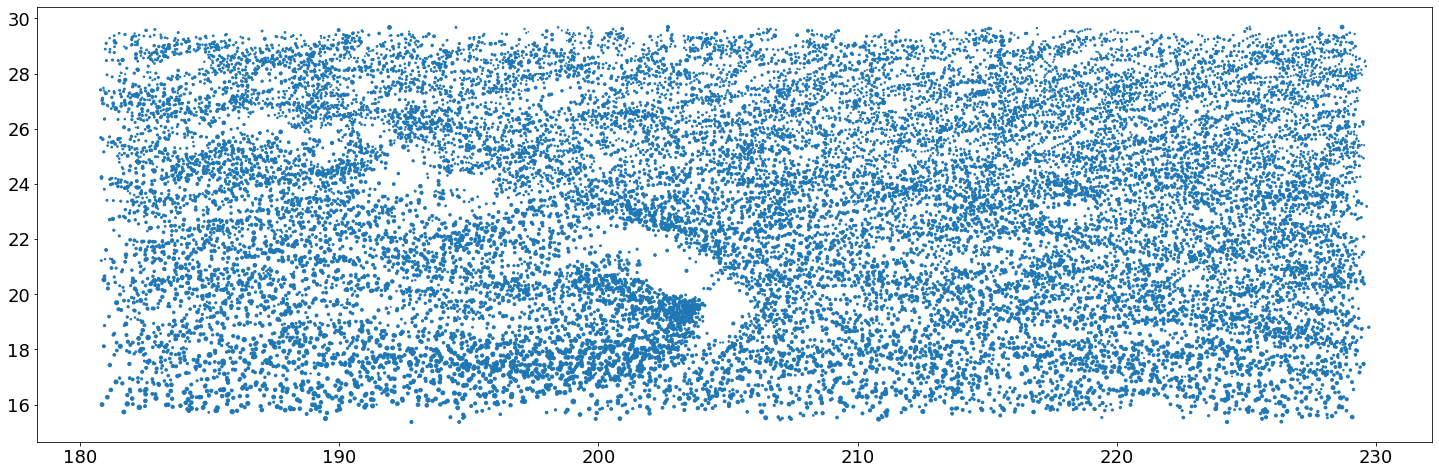

In [5]:
fig,ax = plt.subplots(1,1,figsize=(25,8))

ax.scatter(anti_df['Center Lon'],anti_df['Center Lat'],anti_df['Trans_Speed (cm/s-1)'])

(array([1.0541e+04, 1.0055e+04, 2.9690e+03, 6.7700e+02, 1.3200e+02,
        2.0000e+01, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  4.19857328,  8.39714656, 12.59571985, 16.79429313,
        20.99286641, 25.19143969, 29.39001297, 33.58858626, 37.78715954,
        41.98573282]),
 <BarContainer object of 10 artists>)

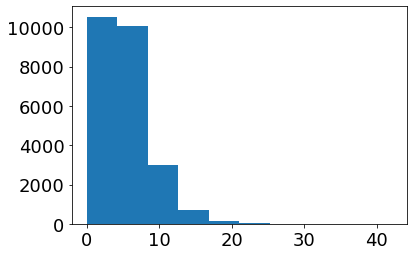

In [6]:
plt.hist(anti_df['Trans_Speed (cm/s-1)'])

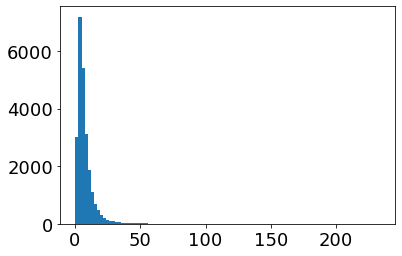

In [7]:
plt.hist(anti_df['Nonlin_param'],bins=100)
plt.show()

In [8]:
print(np.nanmean(anti_df['Nonlin_param']))
print(np.nanmin(anti_df['Nonlin_param']))

7.488053580978161
0.3071781789054122


###  Set up grid

In [9]:
def grid_nonlin_param(df,lat_array,lon_array):
    """

    """
    
    nonlin_grid = np.zeros((len(lat_array),len(lon_array)))
    obs_grid = np.zeros((len(lat_array),len(lon_array)))

    for index, row in df.iterrows():
        lat_ind = find_nearest(lat_array,row['Center Lat'])
        lon_ind = find_nearest(lon_array,row['Center Lon'])
        if np.isnan(row['Nonlin_param']):
            pass
        else:
            nonlin_grid[lat_ind,lon_ind] += row['Nonlin_param']
            obs_grid[lat_ind,lon_ind] += 1
        
    return obs_grid, np.divide(nonlin_grid,obs_grid)

In [10]:
res = 0.5 # grid resolution
lat_array = np.arange(15,30,res)
lon_array = np.arange(180,230,res)

obs_grid_cyc,mean_nonlin_cyc = grid_nonlin_param(cyc_df,lat_array,lon_array)
obs_grid_anti,mean_nonlin_anti = grid_nonlin_param(anti_df,lat_array,lon_array)

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Longitiude')

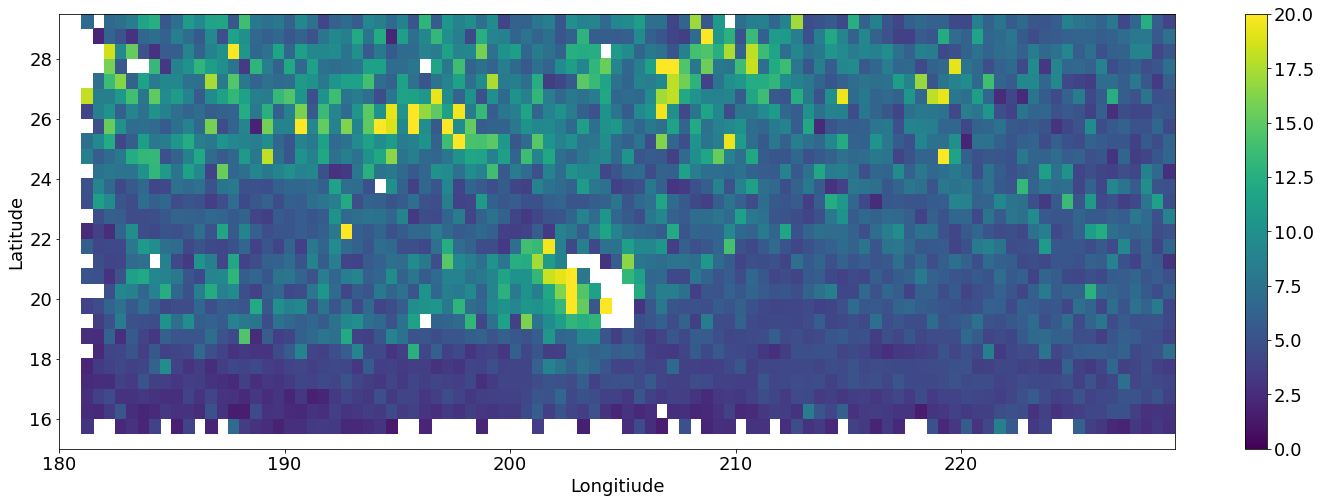

In [11]:
fig,ax = plt.subplots(1,1,figsize=(25,8))

plot = ax.pcolormesh(lon_array,lat_array,mean_nonlin_cyc,vmin=0,vmax=20)
plt.colorbar(plot)

ax.set_ylabel("Latitude")
ax.set_xlabel("Longitiude")

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Longitiude')

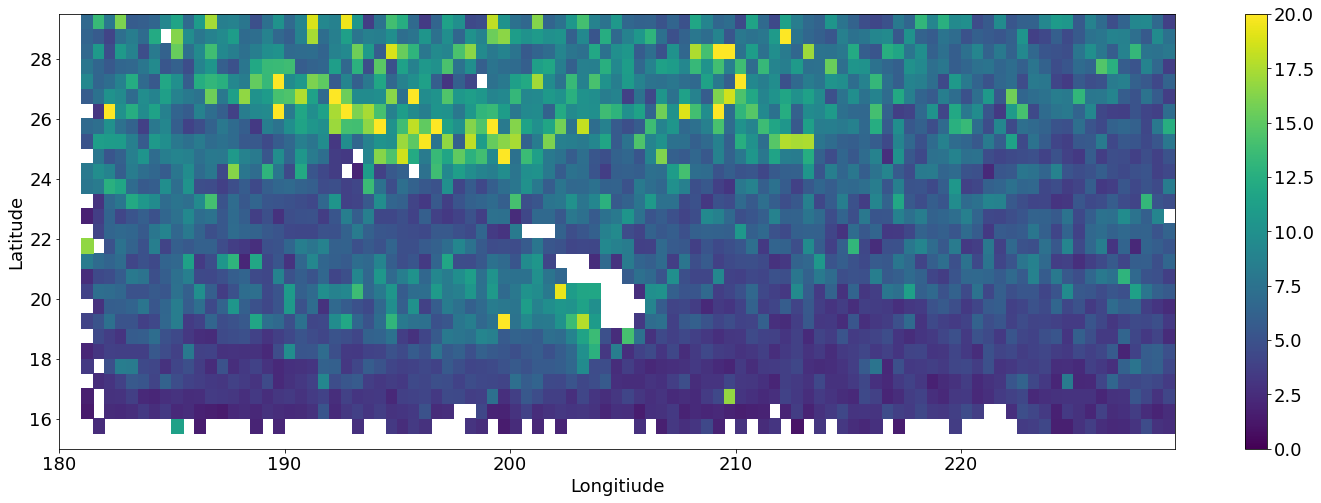

In [12]:
fig,ax = plt.subplots(1,1,figsize=(25,8))

plot = ax.pcolormesh(lon_array,lat_array,mean_nonlin_anti,vmin=0,vmax=20)
plt.colorbar(plot)

ax.set_ylabel("Latitude")
ax.set_xlabel("Longitiude")

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Longitiude')

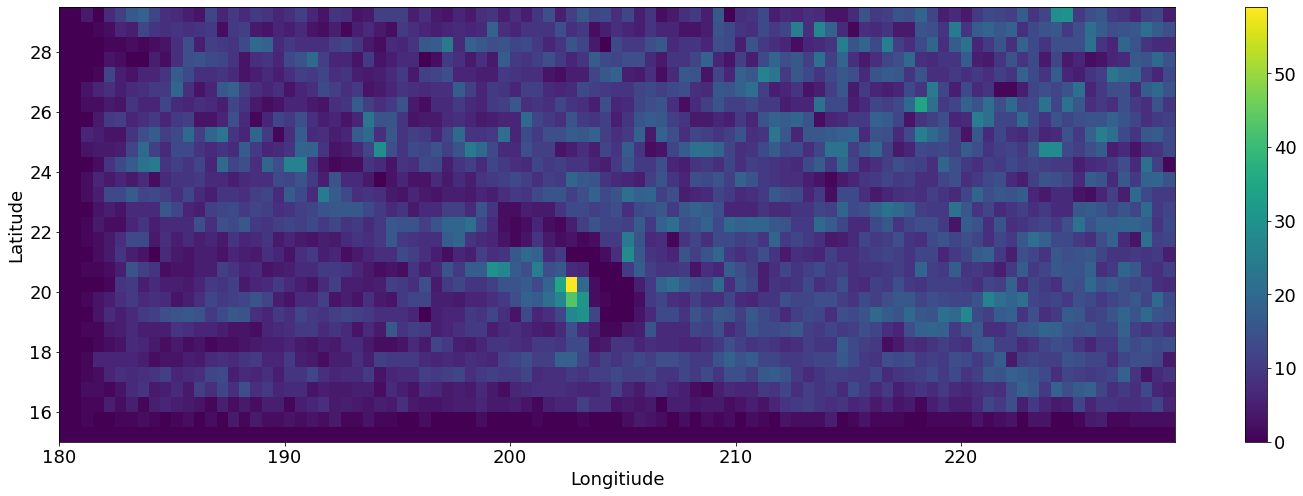

In [13]:
fig,ax = plt.subplots(1,1,figsize=(25,8))

plot = ax.pcolormesh(lon_array,lat_array,obs_grid_cyc)
plt.colorbar(plot)

ax.set_ylabel("Latitude")
ax.set_xlabel("Longitiude")

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Longitiude')

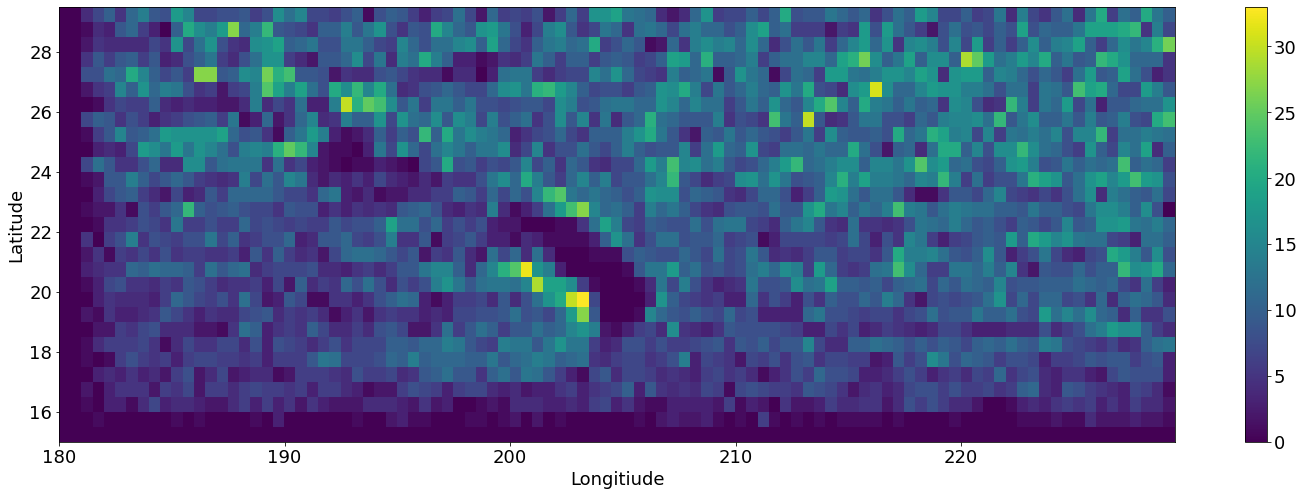

In [14]:
fig,ax = plt.subplots(1,1,figsize=(25,8))

plot = ax.pcolormesh(lon_array,lat_array,obs_grid_anti)
plt.colorbar(plot)

ax.set_ylabel("Latitude")
ax.set_xlabel("Longitiude")

### Combine Anti & Cyc 

In [15]:
nonlin_grid = np.zeros((len(lat_array),len(lon_array)))
obs_grid = np.zeros((len(lat_array),len(lon_array)))
for df in [anti_df,cyc_df]:
    for index, row in df.iterrows():
        lat_ind = find_nearest(lat_array,row['Center Lat'])
        lon_ind = find_nearest(lon_array,row['Center Lon'])
        if np.isnan(row['Nonlin_param']):
            pass
        else:
            nonlin_grid[lat_ind,lon_ind] += row['Nonlin_param']
            obs_grid[lat_ind,lon_ind] += 1
            
nonlin_mean = np.divide(nonlin_grid,obs_grid)

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [16]:
print(np.shape(nonlin_mean))
print(np.shape(lat_array))

(30, 100)
(30,)


In [17]:
west_avg,east_avg = [],[]

lon_cutoff = np.where(lon_array==205)[0][0] # divide between west and east
for row in nonlin_mean:
    west_avg.append(np.nanmean(row[0:lon_cutoff]))
    east_avg.append(np.nanmean(row[lon_cutoff:]))

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


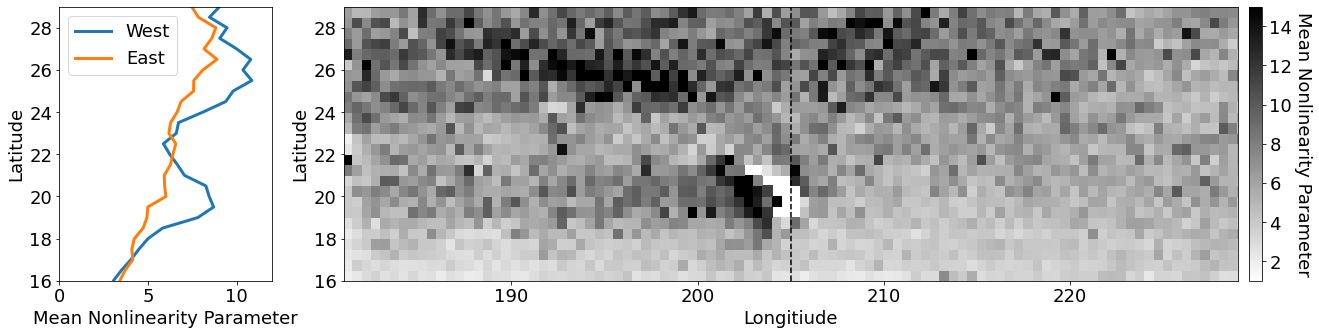

In [18]:
fig,ax = plt.subplots(1,2,figsize=(20,5), gridspec_kw={'width_ratios': [1,5]})

linewidth = 3
ax[0].plot(west_avg,lat_array,linewidth=linewidth,label='West')
ax[0].plot(east_avg,lat_array,linewidth=linewidth,label='East')
ax[0].legend()
ax[0].set_xlabel('Mean Nonlinearity Parameter')
ax[0].set_ylabel('Latitude')

plot = ax[1].pcolormesh(lon_array,lat_array,nonlin_mean,vmin=1,vmax=15,cmap='binary')
ax[1].axvline(205,c='k',linestyle='--')

cbar = fig.colorbar(plot, ax=ax[1], pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Mean Nonlinearity Parameter', rotation=270, fontsize=fontsize)

ax[1].set_xlabel("Longitiude")
ax[1].set_ylabel("Latitude")

# Crop 1 degree off due to low quantity
ax[1].set_xlim([181,229])
ax[1].set_ylim([16,29])

ax[0].set_xlim([0,12])
ax[0].set_ylim([16,29])

plt.tight_layout()

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'nonlinearity.png', format='png', dpi=300)

### Stats about nonlinearity

In [19]:
save_dir = '/nfs/micklab005/jonesae/NP_2000_to_2020/'
with open(save_dir + 'SLA_non_overlapping_dict.txt') as f:
    data = f.read()
SLA_non_overlapping = json.loads(data)

with open(save_dir + 'SLA_overlapping_dict.txt') as f:
    data = f.read()
SLA_overlapping = json.loads(data)

In [20]:
def check_overlap(row,letter):
    """
    letter: 'A' or 'C'
    """

    # Check if overlapping with RCLV or not
    key = letter + 'S' + str(int(row['Eddy ID']))
    current_date = row['Date']

    if key in SLA_overlapping: 
        if current_date in SLA_overlapping[key]:
            # SLA instance is overlapping
            overlap = 1

    elif key in SLA_non_overlapping: 
        if current_date in SLA_non_overlapping[key]:
            # SLA instance is non_overlapping
            overlap = 0

            
    return overlap

In [21]:
def count_overlaps_vs_nonlin(df,letter):
    overlap_nonlin,nonoverlap_nonlin = [],[]
    
    for index, row in df.iterrows():
        # Check if overlapping with RCLV or not
        
        key = letter + 'S' + str(int(row['Eddy ID']))
        current_date = str(int(row['Date']))

        if key in SLA_non_overlapping:
            if current_date in SLA_non_overlapping[key]: # SLA instance is not overlapping on this date
                nonoverlap_nonlin.append(row['Nonlin_param'])
            else: # SLA is overlapping on this date
                overlap_nonlin.append(row['Nonlin_param'])
        else: # SLA eddy always overlaps
            overlap_nonlin.append(row['Nonlin_param'])
    
    return overlap_nonlin,nonoverlap_nonlin

In [22]:
anti_df[0:10]

,Unnamed: 0,Date,Eddy ID,Age (days),Trans_Speed (cm/s-1),Max_Rot_Speed (cm/s-1),Nonlin_param,Area (km2),Center Lon,Center Lat,...,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204
0,198,20000101,27,1,NaN,33.969457,NaN,59843.462114,193.522517,25.808362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,206,20000109,27,9,2.184807,33.403141,15.288831,48661.770478,193.492802,25.865187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,214,20000117,27,17,1.917863,36.086514,18.816004,47889.361422,193.513549,25.953178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,20000125,27,25,1.055329,31.677060,30.016283,55227.247447,193.492105,25.976445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,230,20000202,27,33,1.670797,29.457196,17.630629,45572.134257,193.468729,26.047529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,238,20000210,27,41,1.242662,34.284889,27.589880,35148.962629,193.524129,26.154834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,246,20000218,27,49,1.851664,49.017262,26.472005,28192.930515,193.553311,26.229698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,254,20000226,27,57,3.287316,39.725711,12.084542,19698.869166,193.597130,26.332886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,262,20000101,30,1,NaN,41.358361,NaN,18926.364493,194.198812,16.882756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,270,20000109,30,9,10.066971,50.109860,4.977650,35525.741657,193.325978,16.937116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
anti_overlap_nonlin,anti_nonoverlap_nonlin = count_overlaps_vs_nonlin(anti_df,'A')
print(len(anti_overlap_nonlin))
print(len(anti_nonoverlap_nonlin))
print(len(anti_overlap_nonlin) + len(anti_nonoverlap_nonlin))

18596
6569
25165


In [24]:
def remove_nans_from_list(this_list):
    return [i for i in this_list if ~np.isnan(i)]

In [25]:
anti_overlap_nonlin = remove_nans_from_list(anti_overlap_nonlin)
anti_nonoverlap_nonlin = remove_nans_from_list(anti_nonoverlap_nonlin)

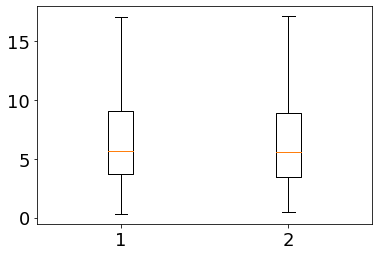

In [26]:
plt.boxplot([anti_overlap_nonlin,anti_nonoverlap_nonlin],showfliers=False)
plt.show()

In [27]:
print(np.nanmean(anti_overlap_nonlin))
print(np.nanmean(anti_nonoverlap_nonlin))

7.53677417601677
7.349626705855688


In [28]:
print(np.nanmedian(anti_overlap_nonlin))
print(np.nanmedian(anti_nonoverlap_nonlin))

5.651545856489978
5.599652612194118


In [29]:
cyc_overlap_nonlin,cyc_nonoverlap_nonlin = count_overlaps_vs_nonlin(cyc_df,'C')
print(len(cyc_overlap_nonlin))
print(len(cyc_nonoverlap_nonlin))
print(len(cyc_overlap_nonlin) + len(cyc_nonoverlap_nonlin))

20894
6494
27388


In [30]:
cyc_overlap_nonlin = remove_nans_from_list(cyc_overlap_nonlin)
cyc_nonoverlap_nonlin = remove_nans_from_list(cyc_nonoverlap_nonlin)

In [31]:
print(np.nanmean(cyc_overlap_nonlin))
print(np.nanmean(cyc_nonoverlap_nonlin))

7.159223103741456
7.321591232588599


In [32]:
print(np.nanmedian(cyc_overlap_nonlin))
print(np.nanmedian(cyc_nonoverlap_nonlin))

5.5051847856213785
5.484476170932094


In [33]:
all_overlap = anti_overlap_nonlin + cyc_overlap_nonlin
all_nonoverlap = anti_nonoverlap_nonlin + cyc_nonoverlap_nonlin

print(len(all_overlap))
print(len(all_nonoverlap))

37773
12471


In [34]:
print(np.nanmean(all_overlap))
print(np.nanmean(all_nonoverlap))
print(np.nanmedian(all_overlap))
print(np.nanmedian(all_nonoverlap))

7.337028838650136
7.3356662945824445
5.5660298081633135
5.544506335089922


In [35]:
overlap_g1 = [i for i in all_overlap if i > 1]
nonoverlap_g1 = [i for i in all_nonoverlap if i > 1]

In [36]:
len(overlap_g1)/len(all_overlap)

0.9950493738914039

In [37]:
len(nonoverlap_g1)/len(all_nonoverlap)

0.9923021409670435

### Box Plots of Nonlinearity Param

Set up province grid to sort the nonlin param values

In [38]:
lat_array = np.arange(15,30,0.1)
lon_array = np.arange(180,230,0.1)
province_grid = np.zeros((len(lat_array),len(lon_array)))

In [39]:
def lin_eq(x1,x2,y1,y2):
    m = (y2-y1)/(x2-x1)
    b = y1 - (m*x1)
    return m,b

cyc_x1,cyc_x2 = 204.5,199
cyc_y1,cyc_y2 = 20,23.01
anti_x1,anti_x2 = 198.5,204.5
anti_y1,anti_y2 = 15,19

cyc_slope,cyc_intercept = lin_eq(cyc_x1,cyc_x2,cyc_y1,cyc_y2)
anti_slope,anti_intercept = lin_eq(anti_x1,anti_x2,anti_y1,anti_y2)

In [40]:
### KEY ###
# 0: SE
# 1: Northern lats
# 2: lee eddies

province_grid[np.where(lat_array >= 23),:] = 1 # North vs South

# lower slope part
for y in np.arange(anti_y1,anti_y2,0.1):
    x_max = (y-anti_intercept)/anti_slope
    province_grid[np.where(np.isclose(lat_array,y)),np.where(lon_array < x_max)] = 2
    
# vertical part at big island
for y in np.arange(anti_y2,19.5,0.1):
    x_max = 204.5
    province_grid[np.where(np.isclose(lat_array,y)),np.where(lon_array < x_max)] = 2
    
# upper slope part
for y in np.arange(cyc_y1,cyc_y2,0.1):
    x_max = (y-cyc_intercept)/cyc_slope
    province_grid[np.where(np.isclose(lat_array,y)),np.where(lon_array < x_max)] = 2

# vertical part at big island
for y in np.arange(19.5,cyc_y1,0.1):
    x_max = 204.5
    province_grid[np.where(np.isclose(lat_array,y)),np.where(lon_array < x_max)] = 2

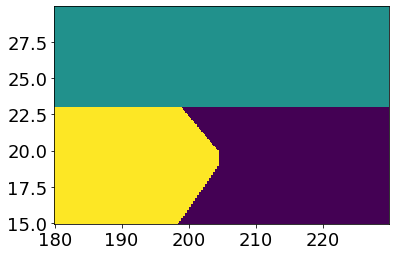

In [41]:
plt.pcolormesh(lon_array,lat_array,province_grid,shading='nearest')
plt.show()

In [42]:
def nonlin_param_by_province(df,grid):
    
    lat_array = np.arange(15,30,0.1)
    lon_array = np.arange(180,230,0.1)
    
    N_nonlin,SE_nonlin,lee_nonlin = [],[],[]
    for index, row in df.iterrows():
        # Get grid value
        lat_ind = find_nearest(lat_array,row['Center Lat'])
        lon_ind = find_nearest(lon_array,row['Center Lon'])
        
        nonlin = row['Nonlin_param']
        if np.isnan(nonlin):
            pass
        else:
            if province_grid[lat_ind,lon_ind] == 0: # SE
                SE_nonlin.append(nonlin)
            elif province_grid[lat_ind,lon_ind] == 1: # north
                N_nonlin.append(nonlin)
            else:
                lee_nonlin.append(nonlin)
                
    return N_nonlin,SE_nonlin,lee_nonlin

In [43]:
anti_N_nonlin,anti_SE_nonlin,anti_lee_nonlin = nonlin_param_by_province(anti_df,province_grid)
cyc_N_nonlin,cyc_SE_nonlin,cyc_lee_nonlin = nonlin_param_by_province(cyc_df,province_grid)

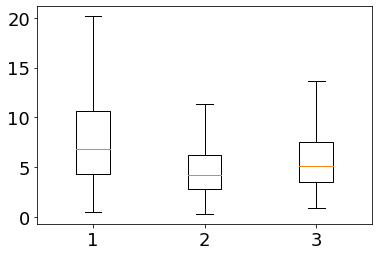

In [44]:
plt.boxplot([anti_N_nonlin,anti_SE_nonlin,anti_lee_nonlin],showfliers=False)
plt.show()

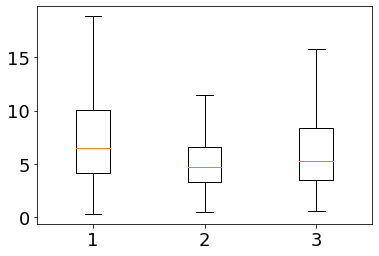

In [45]:
plt.boxplot([cyc_N_nonlin,cyc_SE_nonlin,cyc_lee_nonlin],showfliers=False)
plt.show()

In [46]:
def prob_dens_diff(polarity):
    """
    polarity: 'anti' or 'cyc'
    """

    num_bins = 100
            
    SE_diff,N_diff,lee_diff = [],[],[]
    
    for season in ['WINTER','SPRING','SUMMER','FALL']:   
        for province in [0,1,2,3]:
            #### Province key #### 0: SE, 1: Northern lats, 2: Upper cyclonic lee eddies, 3: Lower anticyclonic lee eddies
            data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'
            bg_chl = np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,province))
            SSH_chl = np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,province)) # leaky only
            coh_chl = np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,province)) # coh only
            SSH_coh_chl = np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,province)) # overlapping
            
            RCLV_chl = np.concatenate((coh_chl,SSH_coh_chl))
    
            # Background data (need this to set the limits)
            bg_quant_min,bg_quant_max = np.quantile(bg_chl,0.01),np.quantile(bg_chl,0.99)
            
            # Hist counts
            leaky_counts,bins = np.histogram(SSH_chl,bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
            coh_counts,bins = np.histogram(RCLV_chl,bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))

            # Get abs value of difference between leaky and coh hists; tells how much trapping structures chl conc
            coh_leaky_diff = np.abs(np.subtract(coh_counts,leaky_counts)) 
            
            if province == 0:
                SE_diff.extend(coh_leaky_diff)
            elif province == 1:
                N_diff.extend(coh_leaky_diff)
            elif (province == 2) or (province == 3):
                lee_diff.extend(coh_leaky_diff)

    return SE_diff,N_diff,lee_diff

In [47]:
anti_SE_diff,anti_N_diff,anti_lee_diff = prob_dens_diff('anti')
cyc_SE_diff,cyc_N_diff,cyc_lee_diff = prob_dens_diff('cyc')

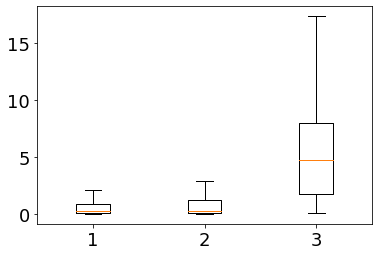

In [48]:
plt.boxplot([anti_SE_diff,anti_N_diff,anti_lee_diff],showfliers=False)
plt.show()

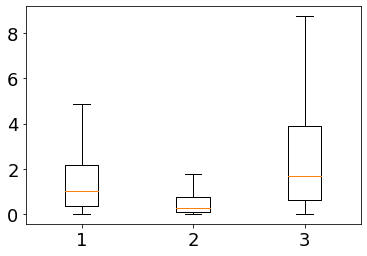

In [49]:
plt.boxplot([cyc_SE_diff,cyc_N_diff,cyc_lee_diff],showfliers=False)
plt.show()

In [50]:
from matplotlib.lines import Line2D

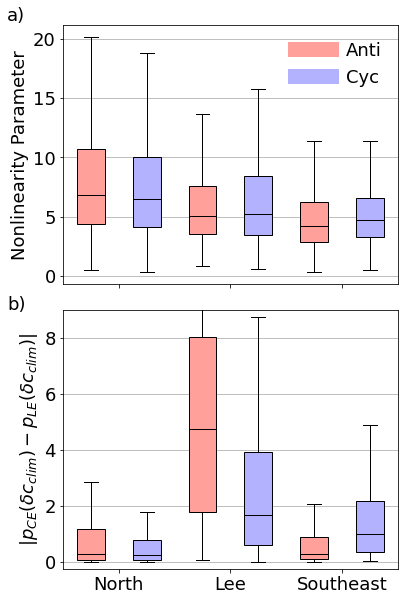

In [51]:
fig, ax = plt.subplots(2,1,figsize=(6,10))
plt.subplots_adjust(hspace=0.1)

anti_color,cyc_color = ['#FFA09A','#B2B2FE']

def boxplot_params(a,datasets):
    bplot = ax[a].boxplot(datasets,showfliers=False,patch_artist=True,medianprops=dict(color='k'))
    for patch, color in zip(bplot['boxes'], [anti_color,cyc_color]*3):
        patch.set_facecolor(color)
    
    ax[a].set_xticks([1.5,3.5,5.5])
    ax[a].grid(axis='y')


boxplot_params(0,[anti_N_nonlin,cyc_N_nonlin,anti_lee_nonlin,cyc_lee_nonlin,anti_SE_nonlin,cyc_SE_nonlin]) # Nonlin param
boxplot_params(1,[anti_N_diff,cyc_N_diff,anti_lee_diff,cyc_lee_diff,anti_SE_diff,cyc_SE_diff]) # Delta chl

ax[0].set_xticklabels([])
ax[1].set_xticklabels(['North','Lee','Southeast'])

ax[1].set_ylim([-0.25,9])

#### Custom legend
custom_lines = [Line2D([0], [0], color=anti_color, lw=15),
                Line2D([0], [0], color=cyc_color, lw=15)]

ax[0].legend(custom_lines, ['Anti', 'Cyc'],frameon=False)

ax[0].set_ylabel('Nonlinearity Parameter')
ax[1].set_ylabel('$|p_{CE}(\delta c_{clim}) - p_{LE}(\delta c_{clim})|$')

ax[0].text(-0.5,21.5,'a)')
ax[1].text(-0.5,9,'b)')

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'nonlin_and_delta_prob_dens.png', format='png', dpi=300)